In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings

In [2]:
data = [278019.7, 252208.7, 242573.8, 218062.8, 258808.9, 234474.3, 223962.2, 202035.7, 235428.7, 212789.3, 201950.3, 
181867.7, 211566.2, 191010.6, 181408.2, 162410, 192572.9, 176597.7, 168549.7, 151137.9, 180828.9, 165484.7, 156489.6, 
140759.8, 167772.3, 152222.7, 143518.7, 129449.6]
data = data[::-1]
data

[129449.6,
 143518.7,
 152222.7,
 167772.3,
 140759.8,
 156489.6,
 165484.7,
 180828.9,
 151137.9,
 168549.7,
 176597.7,
 192572.9,
 162410,
 181408.2,
 191010.6,
 211566.2,
 181867.7,
 201950.3,
 212789.3,
 235428.7,
 202035.7,
 223962.2,
 234474.3,
 258808.9,
 218062.8,
 242573.8,
 252208.7,
 278019.7]

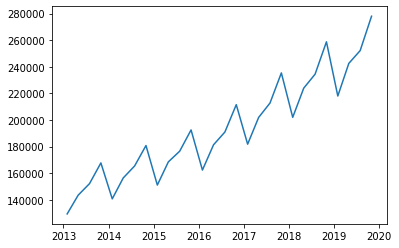

In [3]:
data=np.array(data,dtype=np.float) 
data=pd.Series(data)
data.index = pd.Index(pd.date_range('20130101',periods=28,freq='3M'))
plt.figsize = (12,8)
plt.plot(data)

<Figure size 432x288 with 0 Axes>

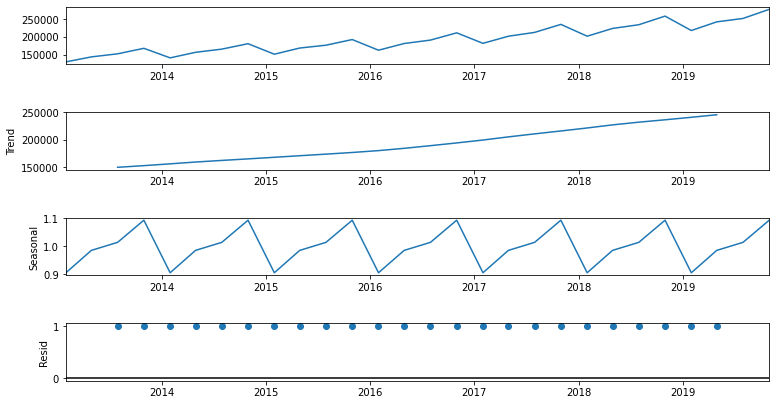

In [4]:
decomposition = seasonal_decompose(data, model='multiplicative', period=4)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

<Figure size 432x288 with 0 Axes>

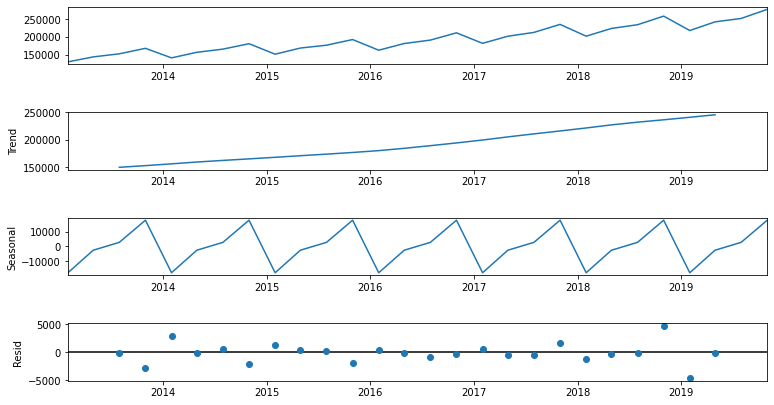

In [5]:
decomposition = seasonal_decompose(data, model='additive', period=4)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

In [6]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 4).mean()
    rolstd = timeseries.rolling(window = 4).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    # plt.title('mean and std')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

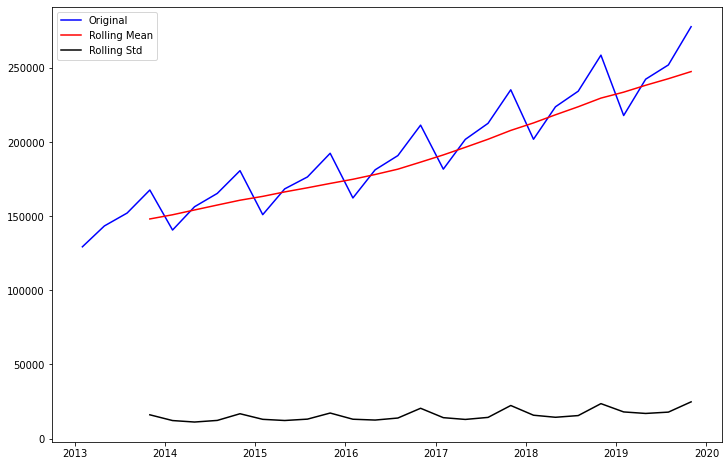

Results of Dickey-Fuller Test:
Test Statistic                  1.713821
p-value                         0.998162
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
dtype: float64
Test Statistic                  1.713821
p-value                         0.998162
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
dtype: float64
Test Statistic                  1.713821
p-value                         0.998162
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [7]:
test_stationarity(data)

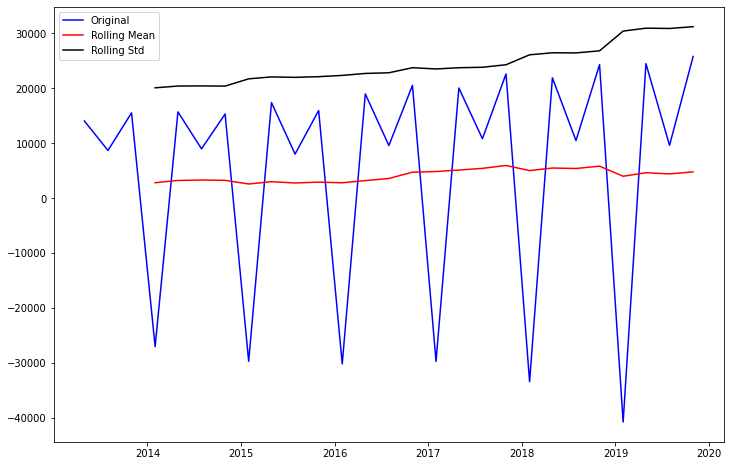

Results of Dickey-Fuller Test:
Test Statistic                 -2.190209
p-value                         0.209818
#Lags Used                      7.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
dtype: float64
Test Statistic                 -2.190209
p-value                         0.209818
#Lags Used                      7.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
dtype: float64
Test Statistic                 -2.190209
p-value                         0.209818
#Lags Used                      7.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [111]:
data_diff1 = data.diff(1)
test_stationarity(data_diff1.dropna(inplace=False))

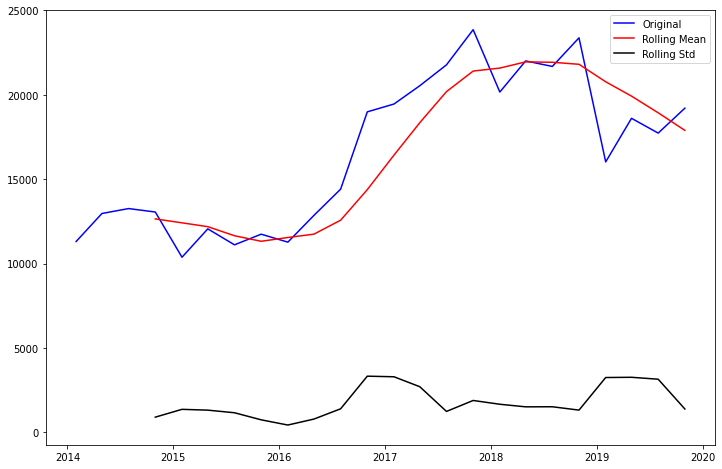

Results of Dickey-Fuller Test:
Test Statistic                 -2.862250
p-value                         0.049917
#Lags Used                      4.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
dtype: float64
Test Statistic                 -2.862250
p-value                         0.049917
#Lags Used                      4.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
dtype: float64
Test Statistic                 -2.862250
p-value                         0.049917
#Lags Used                      4.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [126]:
data_diff4 = data.diff(4)
test_stationarity(data_diff4.dropna(inplace=False))

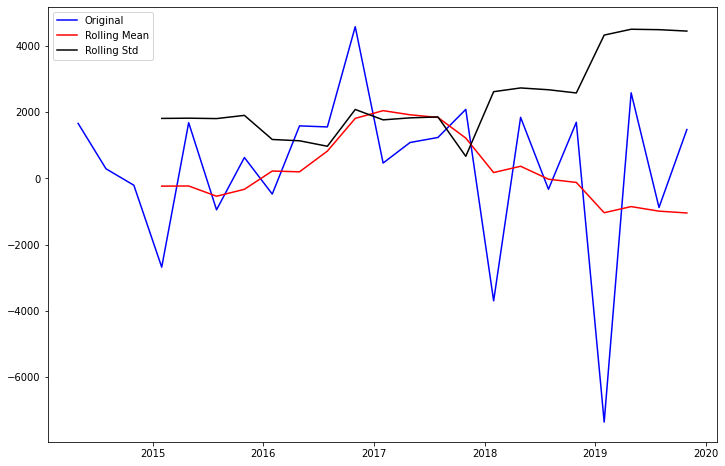

Results of Dickey-Fuller Test:
Test Statistic                 -1.643838
p-value                         0.460256
#Lags Used                      4.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
dtype: float64
Test Statistic                 -1.643838
p-value                         0.460256
#Lags Used                      4.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
dtype: float64
Test Statistic                 -1.643838
p-value                         0.460256
#Lags Used                      4.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [113]:
data_diff1_4 = data_diff1.diff(4)
test_stationarity(data_diff1_4.dropna(inplace=False))

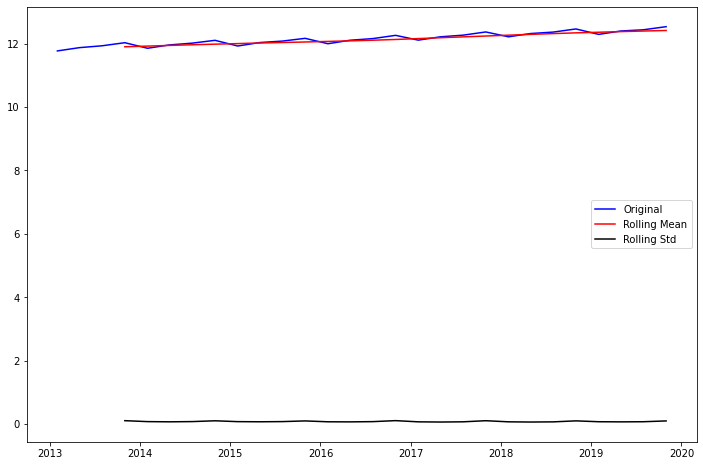

Results of Dickey-Fuller Test:
Test Statistic                  0.714994
p-value                         0.990132
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
dtype: float64
Test Statistic                  0.714994
p-value                         0.990132
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
dtype: float64
Test Statistic                  0.714994
p-value                         0.990132
#Lags Used                      8.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [14]:
data_log = np.log(data)
test_stationarity(data_log)

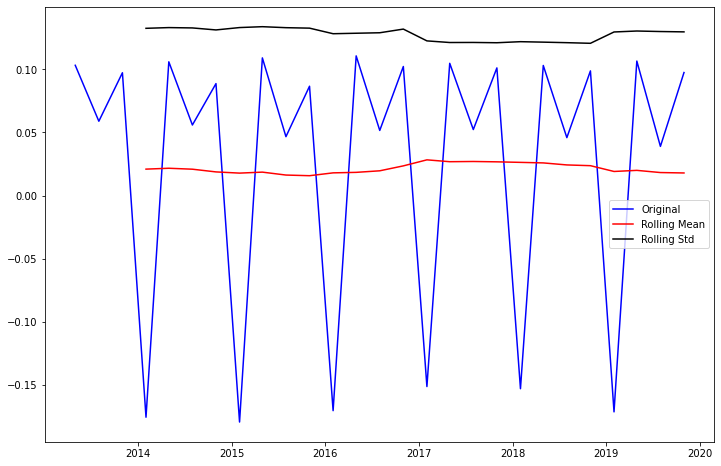

Results of Dickey-Fuller Test:
Test Statistic                 -2.510625
p-value                         0.112911
#Lags Used                      7.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
dtype: float64
Test Statistic                 -2.510625
p-value                         0.112911
#Lags Used                      7.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
dtype: float64
Test Statistic                 -2.510625
p-value                         0.112911
#Lags Used                      7.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [9]:
data_log_1 = data_log.diff(1)
test_stationarity(data_log_1.dropna(inplace=False))

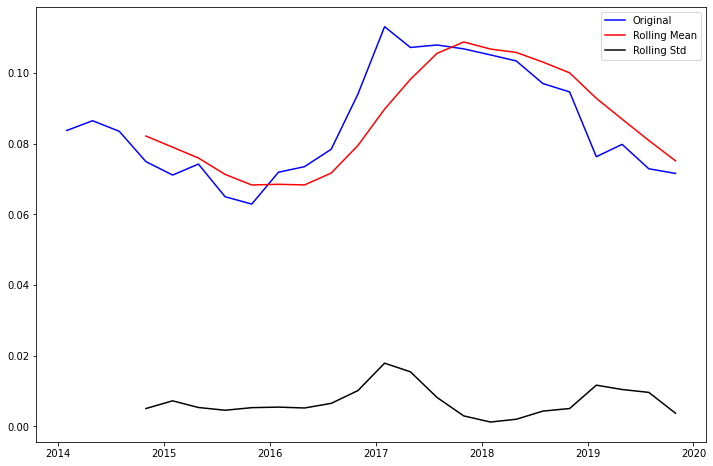

Results of Dickey-Fuller Test:
Test Statistic                 -3.139210
p-value                         0.023784
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
dtype: float64
Test Statistic                 -3.139210
p-value                         0.023784
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
dtype: float64
Test Statistic                 -3.139210
p-value                         0.023784
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [15]:
data_log_4 = data_log.diff(4)
test_stationarity(data_log_4.dropna(inplace=False))

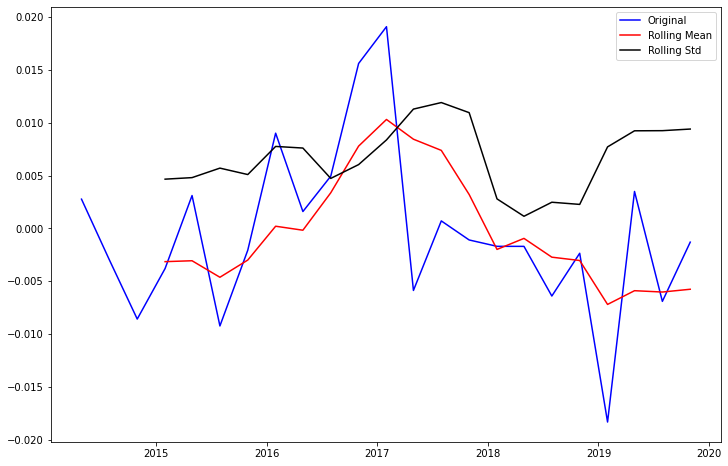

Results of Dickey-Fuller Test:
Test Statistic                 -1.124392
p-value                         0.705247
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
dtype: float64
Test Statistic                 -1.124392
p-value                         0.705247
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
dtype: float64
Test Statistic                 -1.124392
p-value                         0.705247
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


In [11]:
data_log_1_4 = data_log_1.diff(4)
test_stationarity(data_log_1_4.dropna(inplace=False))

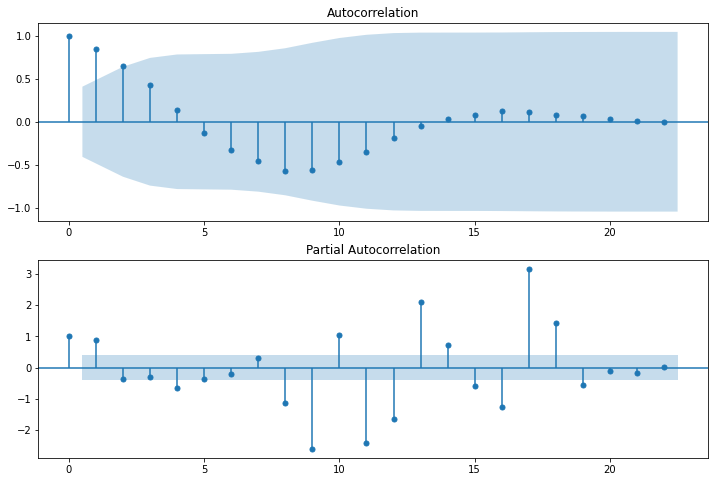

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_log_4.iloc[5:], lags=22, ax=ax1)

#从5开始是因为做季节性差分时window是4
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_log_4.iloc[5:], lags=22, ax=ax2)

In [ ]:
# Initial approximation of parameters
Qs = range(0, 3)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D = 4
d = 4

parameters = itertools.product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
# list参数列表
# print('parameters_list:{}'.format(parameters_list))
# print(len(parameters_list))

results = []
best_aic = float("inf")

for parameters in parameters_list:
    try:
        # SARIMAX 训练的时候用到转换之后的ts
        model = sm.tsa.statespace.SARIMAX(data_log, order=(parameters[0], d, parameters[1]),
                                          seasonal_order=(parameters[2], D, parameters[3], 4)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', parameters)
        continue

    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = parameters
    results.append([parameters, model.aic])

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by='aic', ascending=True).head())
print(best_model.summary())
# Model:             SARIMAX(0, 1, 1)x(1, 1, 2, 12) 

In [17]:
p = d = q = range(0, 3)
 
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], 4, x[2], 4) for x in list(itertools.product(p, d, q))]
 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 4, 1) x (0, 4, 1, 4)
SARIMAX: (0, 4, 1) x (0, 4, 2, 4)
SARIMAX: (0, 4, 2) x (0, 4, 0, 4)
SARIMAX: (0, 4, 2) x (0, 4, 1, 4)


In [19]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

results = []
best_aic = float("inf")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(data_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            result = model.fit()

            # print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            print('wrong parameters:', param_seasonal)
            continue
            
        aic = result.aic
        if aic < best_aic:
            best_result = result
            best_aic = aic
            best_param_seasonal = param_seasonal
            best_param = param
        results.append([param, param_seasonal, result.aic])

result_table = pd.DataFrame(results)
result_table.columns = ['param', 'param_seasonal', 'aic']
print(result_table.sort_values(by='aic', ascending=True).head())
print(best_result.summary()) 

         param param_seasonal        aic
249  (1, 4, 0)   (0, 4, 0, 4) -19.316183
408  (1, 4, 0)   (0, 4, 0, 4) -19.316183
411  (1, 4, 0)   (0, 4, 0, 4) -19.316183
330  (1, 4, 0)   (0, 4, 0, 4) -19.316183
327  (1, 4, 0)   (0, 4, 0, 4) -19.316183
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   28
Model:             SARIMAX(1, 4, 0)x(0, 4, 0, 4)   Log Likelihood                  11.658
Date:                           Fri, 21 Aug 2020   AIC                            -19.316
Time:                                   11:40:04   BIC                            -19.424
Sample:                               01-31-2013   HQIC                           -20.653
                                    - 10-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err  

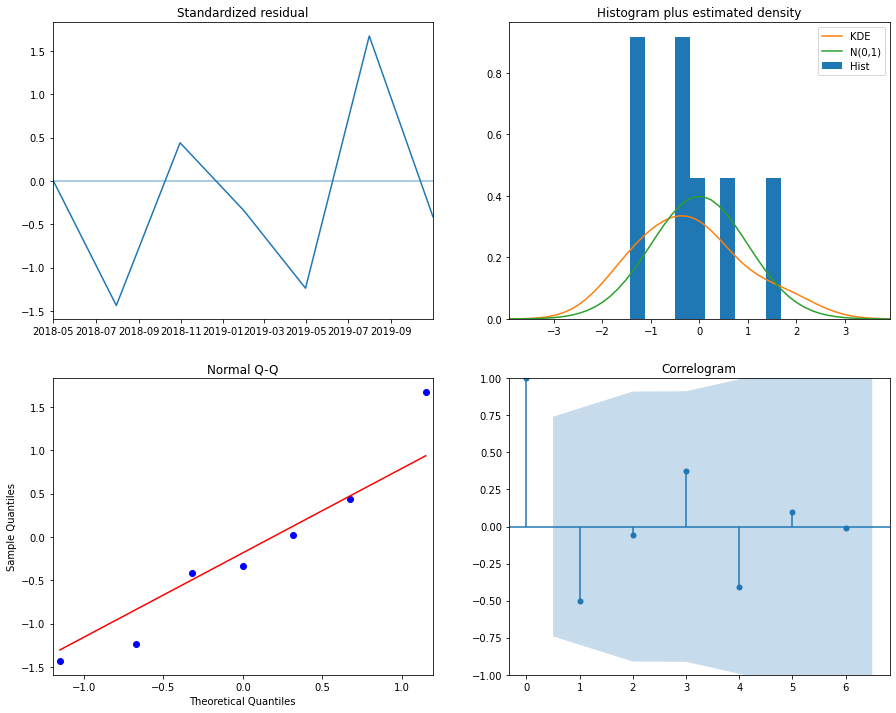

In [33]:
best_result.plot_diagnostics(figsize=(15, 12),lags=6)
plt.show()

In [38]:
pred = best_result.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False) #预测值
pred_ci = pred.conf_int() #置信区间
pred_ci

,lower y,upper y
2020-04-30,12.280005,12.807236


In [23]:
import math

ans = math.exp(12.35)

print(ans)

230960.0428807727
